In [38]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,LSTM
%matplotlib inline

In [39]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [41]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [42]:
df_close= data['Close']

In [43]:
df_close.shape

(2035,)

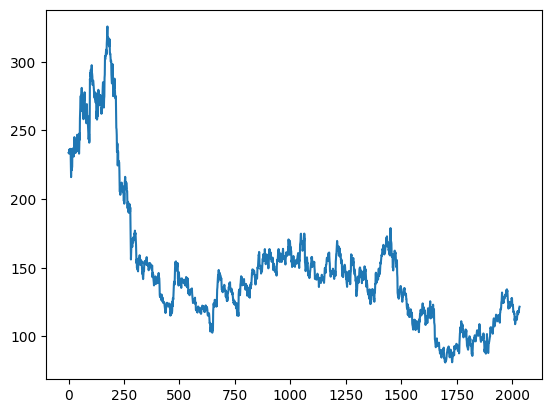

In [44]:
plt.plot(df_close)

In [45]:
df=data.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_scaler=scaler.fit_transform(np.array(df).reshape(-1,1))

In [47]:
df_scaler.shape

(2035, 1)

In [48]:
training_size=int(len(df_scaler)*0.75)
test_size=len(df_scaler)-training_size
train_data,test_data=df_scaler[0:training_size,:],df_scaler[training_size:len(df_scaler),:1]

In [49]:
training_size,test_size

(1526, 509)

In [50]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.18831699],
       [0.18811275],
       [0.17034314]])

In [51]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [52]:
time_step=100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test= create_dataset(test_data,time_step)

In [53]:
print(x_train.shape)
print(y_train.shape)

(1425, 100)
(1425,)


In [54]:
print(x_test.shape)
print(y_test.shape)

(408, 100)
(408,)


In [55]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [56]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 12s 195ms/step - loss: 0.0163 - val_loss: 0.0066
Epoch 2/100
23/23 [==============================] - 4s 166ms/step - loss: 0.0021 - val_loss: 7.8794e-04
Epoch 3/100
23/23 [==============================] - 4s 168ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 4/100
23/23 [==============================] - 4s 178ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 4s 174ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 4s 165ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/100
23/23 [==============================] - 4s 173ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 4s 162ms/step - loss: 0.0011 - val_loss: 9.4845e-04
Epoch 9/100
23/23 [==============================] - 4s 161ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/100
23/23 [==============================] - 4s 163ms/step - loss: 9.4724

In [58]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [59]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [60]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

161.85677282600403

In [61]:
math.sqrt(mean_squared_error(y_test, test_predict))

106.06180724910956

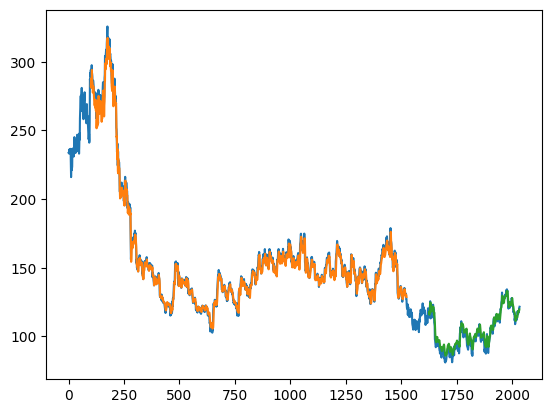

In [65]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_scaler)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_scaler)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_scaler))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()